# Домашнее задание "Теория оптимизации".

### Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

### Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

### Задание 1

Проверим, как поочередное изменение параметров повлияет на количество итераций. При вызове функции с параметрами по умлочанию получаем nit=90

In [8]:
# Будем изменять параметр strategy - используемую стратегию для дифференциальной эволюции

strategies = ['best1bin',
            'best1exp',
            'rand1exp',
            'randtobest1exp',
            'currenttobest1exp',
            'best2exp',
            'rand2exp',
            'randtobest1bin',
            'currenttobest1bin',
            'best2bin',
            'rand2bin',
            'rand1bin']

df = pd.DataFrame(columns=['strategy', 'nit'])
for strategy in strategies:
    res = differential_evolution(ackley, bounds, strategy=strategy, seed=42)
    df.loc[len(df)] = [strategy, res.nit]

df

,strategy,nit
0,best1bin,90
1,best1exp,147
2,rand1exp,246
3,randtobest1exp,156
4,currenttobest1exp,1000
5,best2exp,244
6,rand2exp,341
7,randtobest1bin,101
8,currenttobest1bin,1000
9,best2bin,166


<AxesSubplot:xlabel='strategy'>

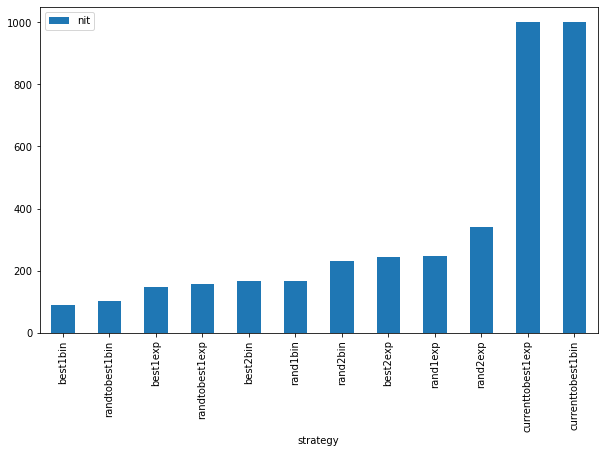

In [19]:
df.sort_values(by='nit').plot.bar(x='strategy', y='nit', figsize=(10, 6))

Наименьшее количество итераций (90) получилось при стратегии **best1bin**. Эта стратегия и является используемой по умолчанию. Наибольшее количество итераций (1000) показали стратегии **currenttobest1exp** и **currenttobest1bin**

In [28]:
# Будем изменять параметр popsize - множитель для установки общей численности популяции
# По умолчанию popsize = 15. Пусть в нашем эксперименте параметр изменяется в пределах от 1 до 30
# Пронаблюдаем, как эволюция поведет себя как при меньших, так и при больших его значениях

df.iloc[0:0]
df = pd.DataFrame(columns=['popsize', 'nit', 'fun'])

for popsize in range(1, 31):
    res = differential_evolution(ackley, bounds, popsize=popsize, seed=42)
    df.loc[len(df)] = [popsize, res.nit, res.fun]
   

,popsize,nit,fun
0,1.0,7.0,2.579928e+00
1,2.0,7.0,2.579928e+00
2,3.0,29.0,6.331649e-04
3,4.0,39.0,1.413367e-05
4,5.0,100.0,4.440892e-16


<AxesSubplot:xlabel='popsize'>

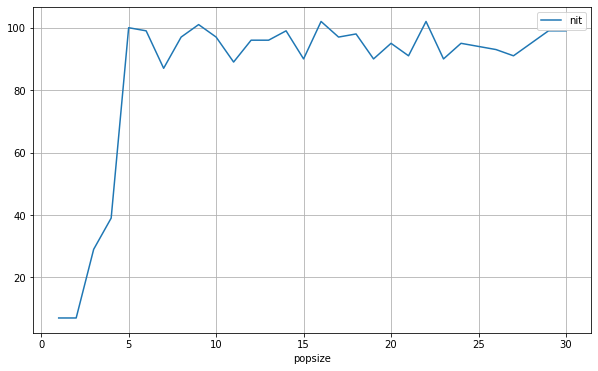

In [27]:
df.plot(x='popsize', y='nit', figsize=(10, 6), grid=True)

<AxesSubplot:xlabel='popsize'>

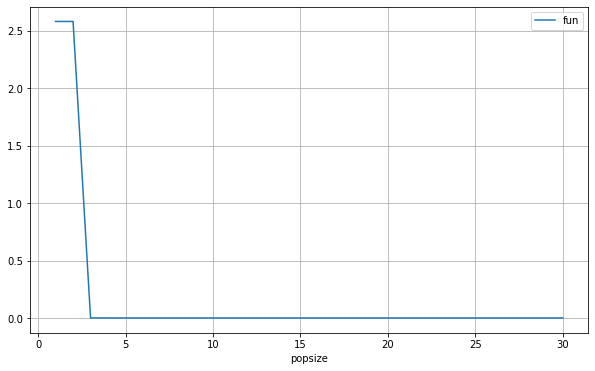

In [29]:
df.plot(x='popsize', y='fun', figsize=(10, 6), grid=True)

In [30]:
df

,popsize,nit,fun
0,1.0,7.0,2.579928e+00
1,2.0,7.0,2.579928e+00
2,3.0,29.0,6.331649e-04
3,4.0,39.0,1.413367e-05
4,5.0,100.0,4.440892e-16
5,6.0,99.0,4.440892e-16
6,7.0,87.0,4.440892e-16
7,8.0,97.0,4.440892e-16
8,9.0,101.0,4.440892e-16
9,10.0,97.0,4.440892e-16


Видим, что минимальное значение итераций достигается при popsize от 1 до 4, а при бОльших значениях параметра количество итераций резко увеличивается и колеблется около значения 100. Однако при popsize < 5 имеем достаточно неточный результат поиска глобального минимума. Найденное значение заметно отличается от 0, который является глобальным минимумом функции. При popsize>=5 результат уже корректный (и одинаковый для всех значений параметра)      

In [35]:
# Найдем минимальное количество итераций для popsize>4
df[(df.nit==df.iloc[4:].nit.min())]

,popsize,nit,fun
6,7.0,87.0,4.440892e-16


Получили минимальное количество итераций = 87 при popsize=7. Однако стоит заметить, что этот количество не сильно меньше количества итераций (90), полученных при использовании параметра по умолчанию

In [39]:
# Будем изменять параметр tol - относительный допуск для сходимости (возможно, не совсем точно перевела описание параметра)
# По умолчанию tol = 0.01. 
# Это параметр, отвечающий за остановку алгоритма. Интуиция такова, что при маленьких значениях tol < 0.01 мы будем получать
# точный результат, но при бОльшем количестве итераций. При росте значения tol количество итераций будет уменьшаться,
# но, возможно, упадет и точность результата. Проверим.

tol_list = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.75, 1]

df.iloc[0:0]
df = pd.DataFrame(columns=['tol', 'nit', 'fun'])

for tol in tol_list:
    res = differential_evolution(ackley, bounds, tol=tol, seed=42)
    df.loc[len(df)] = [tol, res.nit, res.fun]
    
df

,tol,nit,fun
0,0.00000,90.0,4.440892e-16
1,0.00001,90.0,4.440892e-16
2,0.00010,90.0,4.440892e-16
3,0.00100,90.0,4.440892e-16
4,0.01000,90.0,4.440892e-16
5,0.10000,90.0,4.440892e-16
6,0.30000,90.0,4.440892e-16
7,0.50000,1.0,2.579928e+00
8,0.75000,1.0,2.579928e+00
9,1.00000,1.0,2.579928e+00


<AxesSubplot:xlabel='tol'>

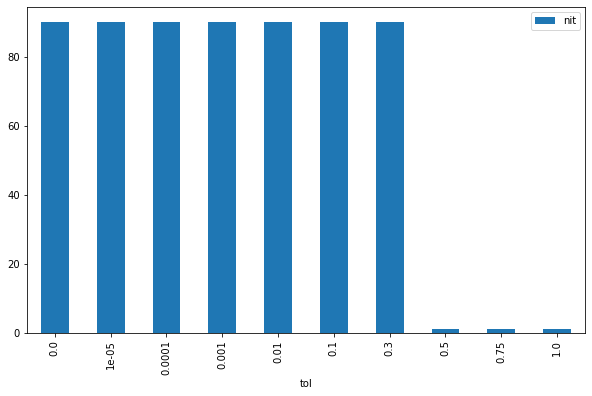

In [40]:
df.plot.bar(x='tol', y='nit', figsize=(10, 6))

Интуиция подтвердилась лишь частично. В итоге получили, что при достаточно малых значениях tol количество итераций неизменно и совпадает с результатом по умолчанию (а я предполагала, что оно будет больше 90) и результат корректен. При достаточно больших значениях tol количество итераций сводится до 1, но и минимум мы получили неточно.

In [47]:
# Будем изменять параметр mutation - константу мутации.
# В документации сказано, что значение этого параметра задается в диапазоне [0, 2). Этими значениями и воспользуемся.
# По умолчанию mutation = 0.5

df.iloc[0:0]
df = pd.DataFrame(columns=['mutation', 'nit', 'fun'])

for mutation in np.linspace(0, 2, 30, endpoint=False):
    res = differential_evolution(ackley, bounds, mutation=mutation, seed=42)
    df.loc[len(df)] = [mutation, res.nit, res.fun]
    
df

,mutation,nit,fun
0,0.000000,3.0,3.574452e+00
1,0.066667,14.0,4.342964e-08
2,0.133333,25.0,4.440892e-16
3,0.200000,28.0,4.440892e-16
4,0.266667,34.0,4.440892e-16
5,0.333333,39.0,4.440892e-16
6,0.400000,47.0,4.440892e-16
7,0.466667,55.0,4.440892e-16
8,0.533333,62.0,4.440892e-16
9,0.600000,76.0,4.440892e-16


<AxesSubplot:xlabel='mutation'>

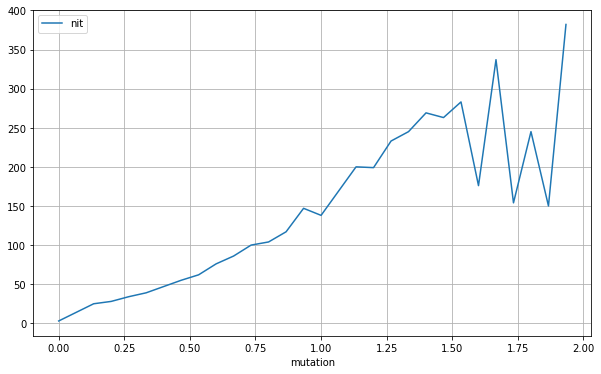

In [48]:
df.plot(x='mutation', y='nit', figsize=(10, 6), grid=True)

<AxesSubplot:xlabel='mutation'>

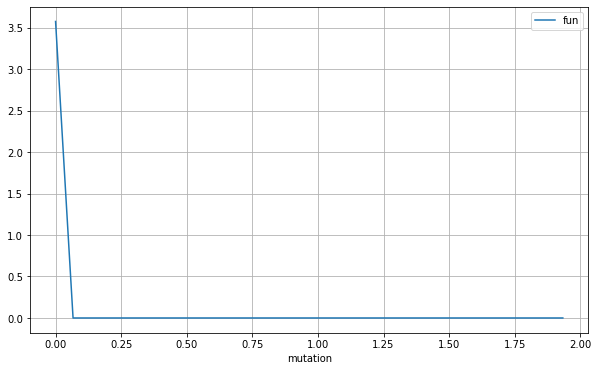

In [50]:
df.plot(x='mutation', y='fun', figsize=(10, 6), grid=True)

Получили, что при увеличении параметра mutation до некоторого значения наблюдается прямая зависимость между параметром и количеством итераций, но после mutation приблизительно равного 1,5 поведение количества итераций довольно хаотично - оно то растет, то падает (но в любом случае больше 90 итераций из вызова с параметрами по умолчанию). 

Так же при малых значениях mutation снова получаем неточный минимум исходной функции. При достаточно больших значениях mutation если мы посмотрим на датасет с результатами, то увидим, что найденные минимумы различны и определенно больше минимума, найденного с параметрами по умолчанию. Тем не менее они достаточно малы, чтобы разница с оптимальным минимумом не была заметна на визуализации, а также при достаточно точном округлении (не менее 8 знаков после запятой)


In [52]:
# Будем изменять параметр recombination - параметр, отвечающий за вероятность перехода "генов".
# Значение этого параметра задается в диапазоне (0, 1). 
# По умолчанию mutation = 0.7

df.iloc[0:0]
df = pd.DataFrame(columns=['recombination', 'nit', 'fun'])

for rec in np.linspace(0.01, 0.99, 30):
    res = differential_evolution(ackley, bounds, recombination=rec, seed=42)
    df.loc[len(df)] = [rec, res.nit, res.fun]
    
df

,recombination,nit,fun
0,0.010000,116.0,4.440892e-16
1,0.043793,110.0,4.440892e-16
2,0.077586,114.0,4.440892e-16
3,0.111379,116.0,4.440892e-16
4,0.145172,122.0,4.440892e-16
5,0.178966,116.0,4.440892e-16
6,0.212759,122.0,4.440892e-16
7,0.246552,109.0,4.440892e-16
8,0.280345,117.0,4.440892e-16
9,0.314138,108.0,4.440892e-16


<AxesSubplot:xlabel='recombination'>

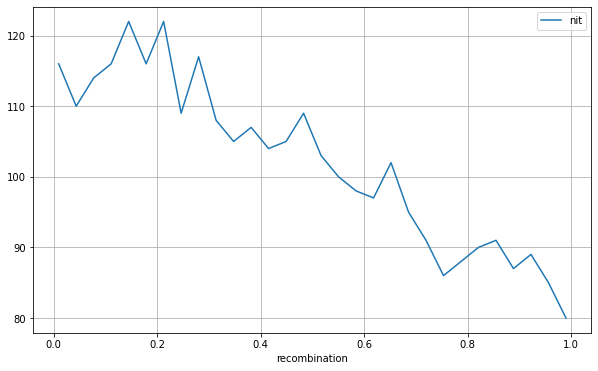

In [54]:
df.plot(x='recombination', y='nit', figsize=(10, 6), grid=True)

Общая тенденция - при росте recombination количество итераций снижается. Однако какой-то строгой зависимости между параметрами не наблюдается.   
Зато минимум получен точный при всех тестовых значениях recombination

In [57]:
# Будем изменять параметр updating - немедленное или отложенное обновление вектора наилучшего решения
# По умолчанию updating = 'immidiate'

df.iloc[0:0]
df = pd.DataFrame(columns=['updating', 'nit', 'fun'])

for upd in ['immediate', 'deferred']:
    res = differential_evolution(ackley, bounds, updating=upd, seed=42)
    df.loc[len(df)] = [upd, res.nit, res.fun]
    
df

,updating,nit,fun
0,immediate,90,4.440892e-16
1,deferred,122,4.440892e-16


<AxesSubplot:xlabel='updating'>

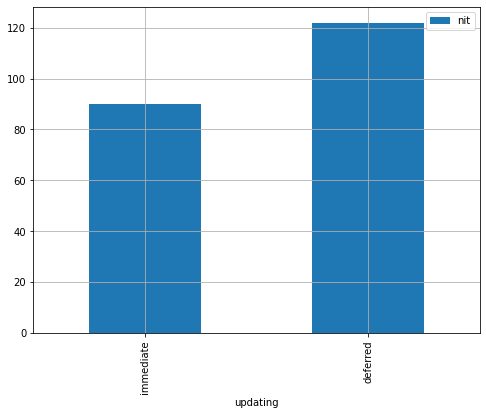

In [58]:
df.plot.bar(x='updating', y='nit', figsize=(8, 6), grid=True)

Результат получен точный в обоих случаях, но количество итераций меньше при немедленном обновлении 

### дополнительное задание

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [3]:
strategies = ['best1bin',
            'best1exp',
            'rand1exp',
            'randtobest1exp',
            'currenttobest1exp',
            'best2exp',
            'rand2exp',
            'randtobest1bin',
            'currenttobest1bin',
            'best2bin',
            'rand2bin',
            'rand1bin']

updatings = ['immediate', 'deferred']

mutations = np.linspace(0.1, 1, 30)

В качестве 3го параметра, который я буду изменять, возьму mutation, т.к. при малых значениях этого параметра получалось заметно меньшее количество итераций при точном нахождении минимума. 

In [5]:
df = pd.DataFrame()

In [6]:
df.iloc[0:0]
df = pd.DataFrame(columns=['updating', 'strategy', 'mutation', 'nit', 'fun'])

for upd in updatings:
    for strategy in strategies:
        for mutation in mutations:
                res = differential_evolution(ackley, bounds, updating=upd, strategy=strategy, mutation=mutation, seed=42)
                df.loc[len(df)] = [upd, strategy, mutation, res.nit, res.fun]
            
df.sort_values(by='nit').head()

,updating,strategy,mutation,nit,fun
0,immediate,best1bin,0.100000,5,3.574452e+00
630,deferred,best2bin,0.100000,7,2.579928e+00
30,immediate,best1exp,0.100000,8,2.579928e+00
360,deferred,best1bin,0.100000,12,1.209607e-08
361,deferred,best1bin,0.131034,14,2.719194e-02


In [15]:
df[df.fun<0.0000001].sort_values(by='nit')

,updating,strategy,mutation,nit,fun
360,deferred,best1bin,0.100000,12,1.209607e-08
1,immediate,best1bin,0.131034,25,4.440892e-16
270,immediate,best2bin,0.100000,26,4.440892e-16
2,immediate,best1bin,0.162069,27,4.440892e-16
3,immediate,best1bin,0.193103,29,4.440892e-16
...,...,...,...,...,...
499,deferred,currenttobest1exp,0.689655,1000,4.440892e-16
500,deferred,currenttobest1exp,0.720690,1000,4.440892e-16
501,deferred,currenttobest1exp,0.751724,1000,4.440892e-16
491,deferred,currenttobest1exp,0.441379,1000,4.440892e-16


Как видно из получившегося датасета, один из лучших результатов (с точки зрения минимизации количества итераций) мы получаем при комбинации параметров:  
- updating = 'deffered'
- strategy = 'best1bin'
- mutation = 0.1

С этими параметрами эволюция нашла минимум за 12 итераций. Этот минимум = 1.209607e-08, этот результат менее точен, чем тот, который мы получали с параметрами по умолчанию. Однако, это тоже малое значение достаточно близкое к 0, и если условия задачи допускают нахождение минимума с подобной точностью, то наш результат может быть засчитан.

Более "честный" минимум равный 4.440892e-16 эволюция нашла за 25 итераций при комбинации параметров:  
- updating = 'immediate'
- strategy = 'best1bin'
- mutation = 0.131034


In [17]:
%%time
differential_evolution(ackley, bounds, updating='deferred', strategy='best1bin', mutation=0.1, seed=42)

Wall time: 54 ms


     fun: 1.2096066814848427e-08
     jac: array([0.84650082, 2.51447432])
 message: 'Optimization terminated successfully.'
    nfev: 516
     nit: 12
 success: True
       x: array([-3.27223131e-09,  2.75351717e-09])

In [21]:
%%time
differential_evolution(ackley, bounds, updating='immediate', strategy='best1bin', mutation=0.131034, seed=42)

Wall time: 125 ms


     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 813
     nit: 24
 success: True
       x: array([0., 0.])

In [20]:
%%time
differential_evolution(ackley, bounds, seed=42)

Wall time: 401 ms


     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

Если сравнить время выполнения функции с подстановкой найденных параметров и функции с параметрами по умолчанию, увидим, что изменение параметров действительно помогает немного выиграть во времени